# Part 2: Use an API to extract box office revenue and profit data to add to your IMDB data and perform exploratory data analysis.

In [2]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [3]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple


In [4]:
# Load API Credentials
# Load API Credentials
with open('/Users/lbodden/.secret/tmdb_api.json') as f:   #use your path here!
    login = json.load(f)
# Instantiate YelpAPI Variable
yelp_api = YelpAPI(login['api-key'], timeout_s=5.0)

In [5]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [6]:
movie = tmdb.Movies('tt0848228')

In [7]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 184.117,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [8]:
info['budget']

220000000

In [9]:
info['revenue']

1518815515

In [10]:
info['imdb_id']

'tt0848228'

In [11]:
# Function to get the certification.
def get_movie_certification(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1'] == "US":
            info['certifcation'] = c['certification']     
    return info

In [18]:
test = get_movie_certification("tt0848228") 
test


{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 184.117,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [13]:
movie2 = tmdb.Movies('tt0332280')

In [14]:
info2 = movie2.info()
info2

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 59.094,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [15]:
info2['budget']

29000000

In [16]:
info2['revenue']

115603229

In [17]:
info2['imdb_id']

'tt0332280'

In [19]:
# Function to get the certification.
def get_movie_certification(movie_id):
    movie2 = tmdb.Movies(movie_id)
    info2 = movie2.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1'] == "US":
            info['certifcation'] = c['certification']     
    return info

In [20]:
test2 = get_movie_certification("tt0332280") 
test2


{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 184.117,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [22]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0332280", "tt0848228"]
results = []
for movie_id in test_ids:
    movie_info = get_movie_certification(movie_id)
    results.append(movie_info)
    
    
pd.DataFrame(results)


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.706,27578,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.706,27578,PG-13


In [23]:
def write_json(new_data, filename):    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [24]:
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['tmbd_data.csv.gz',
 'genres.csv.gz',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'tmdb_api_results_2001.json',
 'title_basics.csv.gz',
 'title_genres.csv.gz',
 'title_aka.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'tmdb_results_combined.csv.gz',
 'title_ratings.csv.gz']

In [35]:
basics_df = pd.read_csv('Data/title_basics.csv.gz', low_memory = False)

In [36]:
basics_df['startYear'] = basics_df['startYear'].astype(int)
basics_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
79700,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,NaN,74,Drama
79701,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,NaN,97,"Comedy,Drama,Fantasy"
79702,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
79703,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


In [37]:
# Let's confirm we don't have missing data.
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79705 entries, 0 to 79704
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          79705 non-null  object 
 1   titleType       79705 non-null  object 
 2   primaryTitle    79705 non-null  object 
 3   originalTitle   79705 non-null  object 
 4   isAdult         79705 non-null  int64  
 5   startYear       79705 non-null  int64  
 6   endYear         0 non-null      float64
 7   runtimeMinutes  79705 non-null  int64  
 8   genres          79705 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.5+ MB


In [38]:
YEARS_TO_GET = [2000, 2001]
errors = [ ]

In [34]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    # Defining the JSON file to store results for year.
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if the file exists.
    file_exists = os.path.isfile(JSON_FILE)
    # If it does exist: notify me.
    if file_exists == True:
        print(f'{YEAR} {JSON_FILE} already exists.')
    # If it does not exist: create it.
    else:
    # Save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as file:
            json.dump([{'imdb_id':0}], file)

    # Saving new year as the current df.        
    df = basics_df.loc[basics_df['startYear'] == YEAR].copy()
    # Saving movie ids to list.
    movie_ids = df['tconst'].copy()
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    
    # Filter out any ids that are already in the JSON_FILE.
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    
    # Start of INNER Loop.
    
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                      desc=f'Movies from {YEAR}',
                                      position=1,
                                      leave=True):
            try:
                # Retrieve then data for the movie id.
                temp = get_movie_certification(movie_id)  
                # Append/extend results to existing file using a pre-made function.
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server.
                time.sleep(0.02)

            except Exception as e:
                errors.append([movie_id, e])

    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

2000 Data/tmdb_api_results_2000.json already exists.


Movies from 2000:   0%|          | 0/1413 [00:00<?, ?it/s]

2001 Data/tmdb_api_results_2001.json already exists.


Movies from 2001:   0%|          | 0/1531 [00:00<?, ?it/s]

- Total errors: 444


In [39]:
movies_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
movies_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)

In [40]:
movies_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
movies_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')


movies_2000_and_2001 = pd.concat([movies_2000, movies_2001])
movies_2000_and_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
2,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
3,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
4,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13


In [41]:
movies_2000_and_2001[movies_2000_and_2001['imdb_id'] == '0']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
movies_2000_and_2001.drop(index=movies_2000_and_2001.index[0], axis=0, inplace=True)
movies_2000_and_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation
1,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
2,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
3,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
4,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
5,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13
3872,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13
3873,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13
3874,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13


In [43]:
movies_2000_and_2001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 1 to 3875
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                8706 non-null   object 
 1   adult                  8706 non-null   float64
 2   backdrop_path          8706 non-null   object 
 3   belongs_to_collection  8706 non-null   object 
 4   budget                 8706 non-null   float64
 5   genres                 8706 non-null   object 
 6   homepage               8706 non-null   object 
 7   id                     8706 non-null   float64
 8   original_language      8706 non-null   object 
 9   original_title         8706 non-null   object 
 10  overview               8706 non-null   object 
 11  popularity             8706 non-null   float64
 12  poster_path            8706 non-null   object 
 13  production_companies   8706 non-null   object 
 14  production_countries   8706 non-null   object 
 15  rele

In [44]:
movies_2000_and_2001.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,8706.0,8706.0,8706.0,8706.000000,8.706000e+03,8706.0,8706.0,8.706000e+03,8706.000000
mean,0.0,220000000.0,24428.0,207.537427,1.518816e+09,143.0,0.0,7.706000e+00,27566.806800
std,0.0,0.0,0.0,27.623976,0.000000e+00,0.0,0.0,1.776459e-15,10.826781
min,0.0,220000000.0,24428.0,184.117000,1.518816e+09,143.0,0.0,7.706000e+00,27552.000000
25%,0.0,220000000.0,24428.0,184.117000,1.518816e+09,143.0,0.0,7.706000e+00,27552.000000
50%,0.0,220000000.0,24428.0,199.999000,1.518816e+09,143.0,0.0,7.706000e+00,27565.000000
75%,0.0,220000000.0,24428.0,249.807000,1.518816e+09,143.0,0.0,7.706000e+00,27578.000000
max,0.0,220000000.0,24428.0,249.807000,1.518816e+09,143.0,0.0,7.706000e+00,27578.000000


In [45]:
movies_2000_and_2001.to_csv(f'./Data/tmdb_results_combined.csv.gz', compression='gzip', index=False)

## Exploratory Data Analysis

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [46]:
money = movies_2000_and_2001[(movies_2000_and_2001['budget'] > 0) \
                                                               & (movies_2000_and_2001['revenue'] > 0)]

In [47]:
valid_financial_info = len(money)
print(f'We identified {valid_financial_info} movies that had at least some valid finalcial information.')

valid_fin_info_impact = round(valid_financial_info/len(movies_2000_and_2001)*100,2)
print(f'This means that just the {valid_fin_info_impact}% are "profitable".')

We identified 8706 movies that had at least some valid finalcial information.
This means that just the 100.0% are "profitable".


In [48]:
# Checking the general info.
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 1 to 3875
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                8706 non-null   object 
 1   adult                  8706 non-null   float64
 2   backdrop_path          8706 non-null   object 
 3   belongs_to_collection  8706 non-null   object 
 4   budget                 8706 non-null   float64
 5   genres                 8706 non-null   object 
 6   homepage               8706 non-null   object 
 7   id                     8706 non-null   float64
 8   original_language      8706 non-null   object 
 9   original_title         8706 non-null   object 
 10  overview               8706 non-null   object 
 11  popularity             8706 non-null   float64
 12  poster_path            8706 non-null   object 
 13  production_companies   8706 non-null   object 
 14  production_countries   8706 non-null   object 
 15  rele

- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [49]:
movies_2000_and_2001['certifcation'].value_counts()

PG-13    8706
Name: certifcation, dtype: int64

In [50]:
# Locate '-' value.
movies_2000_and_2001[movies_2000_and_2001['certifcation'] == '-']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation


In [51]:
# Set dataframe to plot.
movies_2000_and_2001['certifcation'].value_counts(ascending=False)

PG-13    8706
Name: certifcation, dtype: int64

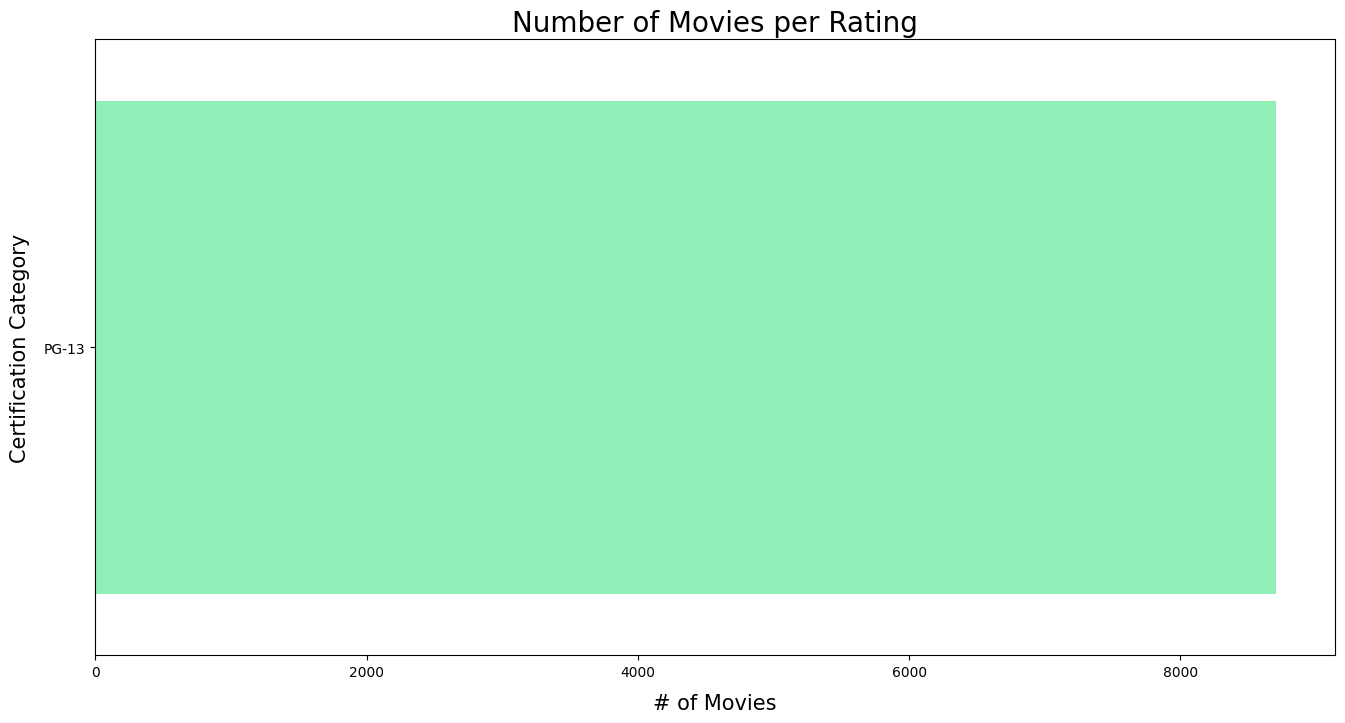

In [52]:
# Let's plot our horizontal bar graph.
## Code inspired in https://machinelearningknowledge.ai/seaborn-countplot-tutorial-for-beginners/
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(data=movies_2000_and_2001, y='certifcation', palette='rainbow',
                   order=movies_2000_and_2001['certifcation'].value_counts(ascending=False).index)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('# of Movies', fontsize=15,labelpad=10)
ax.set_title('Number of Movies per Rating', fontsize=20)
plt.savefig('number_movies_rating.png', pad_inches=1, bbox_inches='tight');

- What is the average revenue per certification category?

In [53]:
movies_2000_and_2001.groupby('certifcation')['revenue'].mean().sort_values(ascending=False)

certifcation
PG-13    1.518816e+09
Name: revenue, dtype: float64

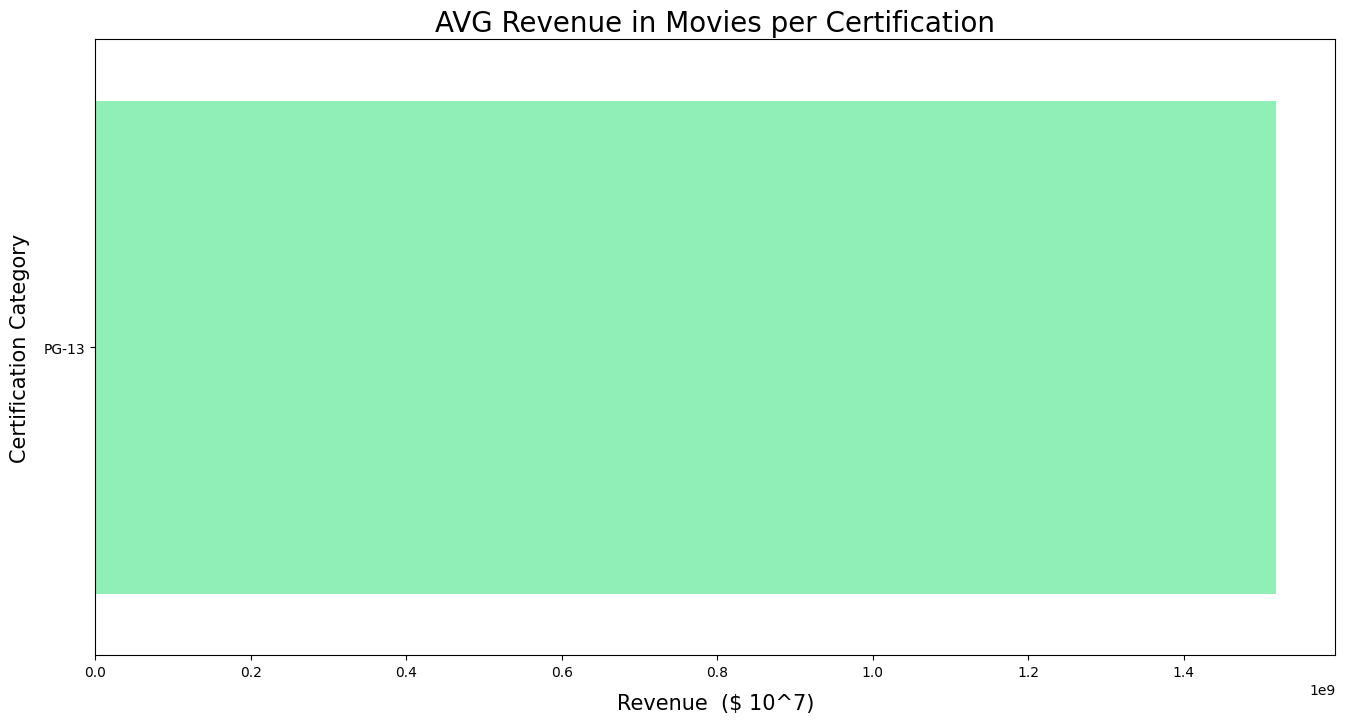

In [55]:
# Plot the results.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=movies_2000_and_2001, x='revenue', y='certifcation', palette='rainbow', ci=None)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('Revenue  ($ 10^7)', fontsize=15,labelpad=10)
ax.set_title('AVG Revenue in Movies per Certification', fontsize=20)
plt.savefig('avg_revenue_certification', pad_inches=1, bbox_inches='tight');

- What is the average budget per certification category?

In [56]:
movies_2000_and_2001.groupby('certifcation')['budget'].mean().sort_values(ascending=False)

certifcation
PG-13    220000000.0
Name: budget, dtype: float64

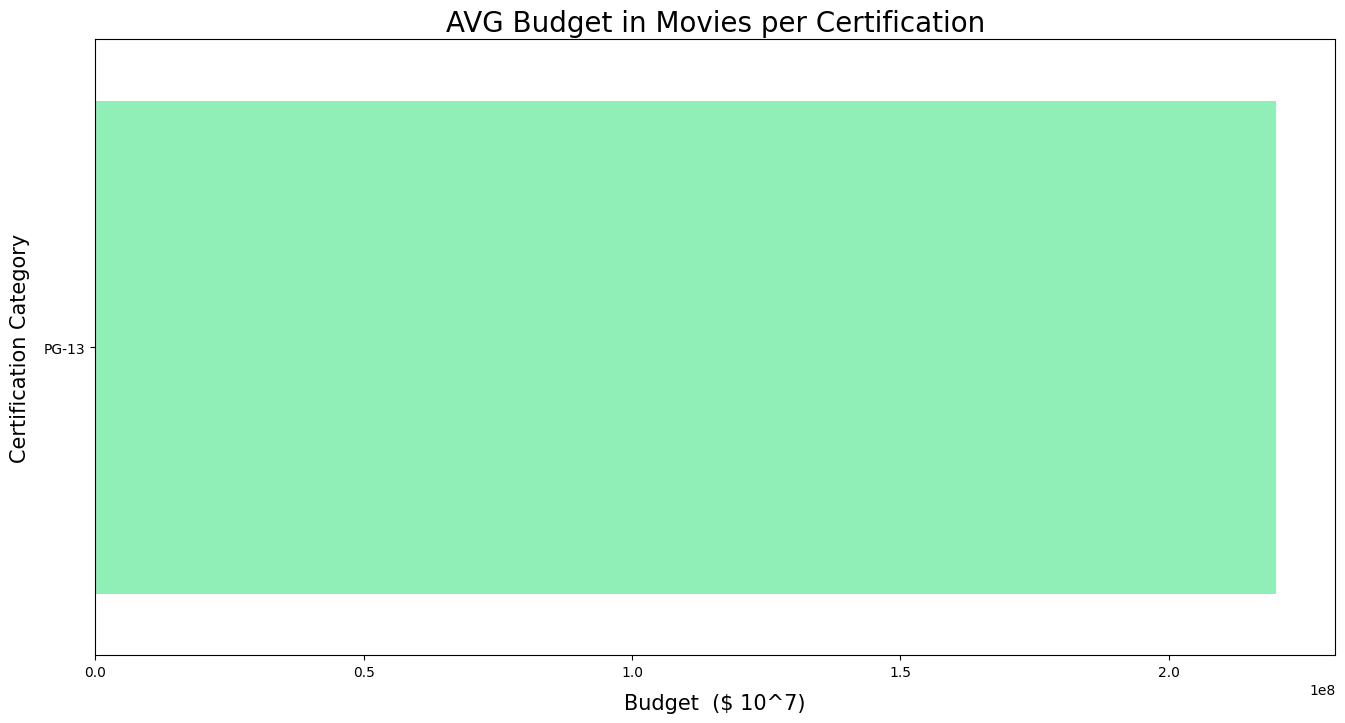

In [57]:
# Plot the results.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=movies_2000_and_2001, x='budget', y='certifcation', palette='rainbow', ci=None)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('Budget  ($ 10^7)', fontsize=15,labelpad=10)
ax.set_title('AVG Budget in Movies per Certification', fontsize=20)
plt.savefig('avg_budget_certification', pad_inches=1, bbox_inches='tight');